In [1]:
#Import Panda Library
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#Read the csv file
dataframe = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv")
dataframe.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
#All Dataset Info

In [2]:
# Displaying the initial rows of the dataset to get a glimpse of its structure
print(dataframe.head())


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [3]:
# Providing a summary of the dataset's information
print(dataframe.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


In [4]:
print(dataframe.describe())


          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

In [5]:
#Handle Missing Data, b/c Nan represents missing values
dataframe = dataframe.dropna()

In [ ]:
#EXPLATORY DATA ANALYSIS(EDA)

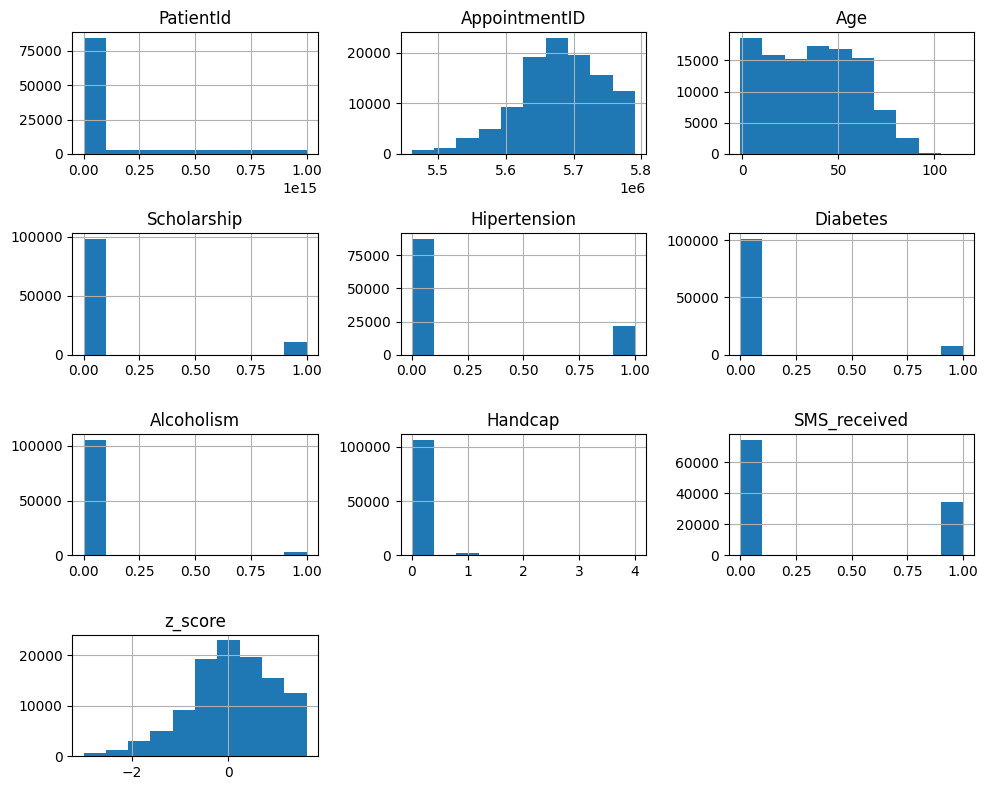

In [10]:
# Plotting histograms for each numerical attribute in the dataset
import matplotlib.pyplot as plt
dataframe.hist(figsize=(10, 8))  # Creating histograms for numerical columns
plt.tight_layout()  # Adjusting layout for better visualization
plt.show()  # Displaying the histograms

In [ ]:
#PREPROCESSING

In [11]:
def preprocess_data(data):
    # Convert date columns to datetime format
    data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
    data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
    
    # Handling missing data
    data.dropna(inplace=True)
    
    
    
    # Check for missing values
    # This line performs the check but doesn't print the sum of missing values


    
    data.isnull().any()

    # Remove duplicates
    data.drop_duplicates(inplace=True)

    # Correcting column names (if needed)
    #data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace=True)
     # Check the number of rows before and after any operations
    print("Number of rows before processing:", len(data))
    

    return data

In [ ]:
#ANALYSING AGE DISTRIBUTION

Number of rows before processing: 108860


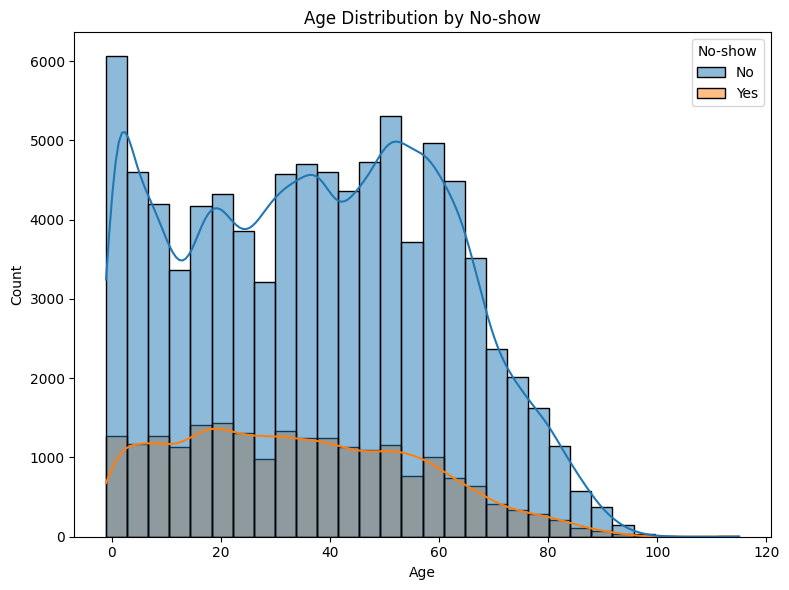

In [13]:
# Function to analyze factors' influence on attendance
import seaborn as sns

def analyze_age_distribution(data):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x='Age', hue='No-show', bins=30, kde=True)
    plt.title('Age Distribution by No-show')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Preprocess the data
data = preprocess_data(dataframe)

# Analyze Age Distribution
analyze_age_distribution(dataframe)

In [ ]:
#Analysing Received Attendance

Number of rows before processing: 108860


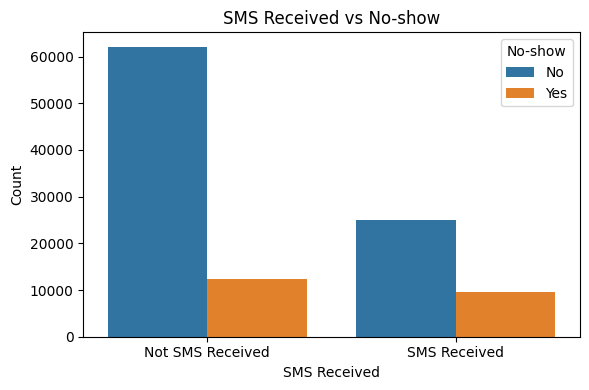

In [14]:
def analyze_sms_received(data):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='SMS_received', hue='No-show', data=data)
    plt.title('SMS Received vs No-show')
    plt.xlabel('SMS Received')
    plt.ylabel('Count')
    
    # Set custom labels for x-axis
    plt.xticks(ticks=[0, 1], labels=['Not SMS Received', 'SMS Received'])
    
    plt.tight_layout()
    plt.show()

# Preprocess the data
data = preprocess_data(dataframe)

# Analyze SMS Received vs No-show
analyze_sms_received(dataframe)

In [ ]:
#Analysing Medical Condition Impact On Attendance

Number of rows before processing: 108860


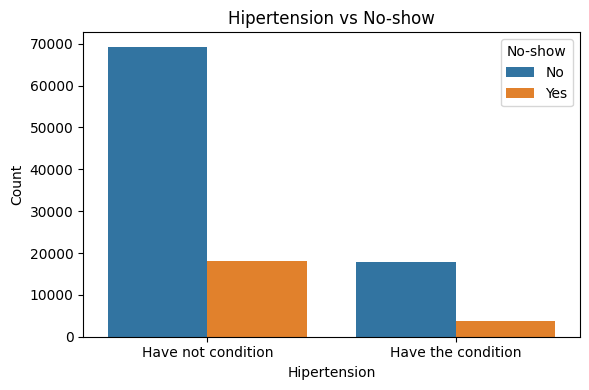

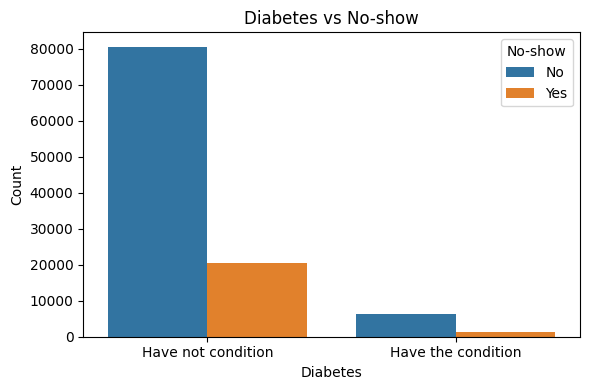

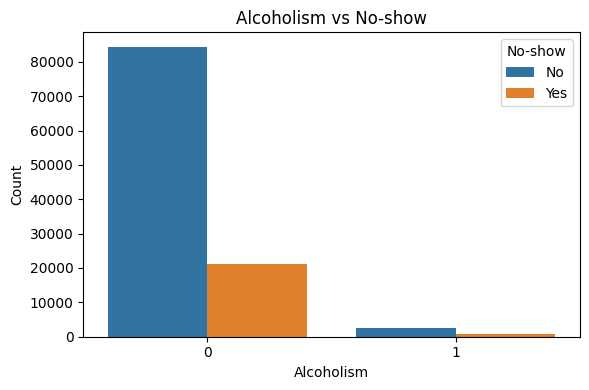

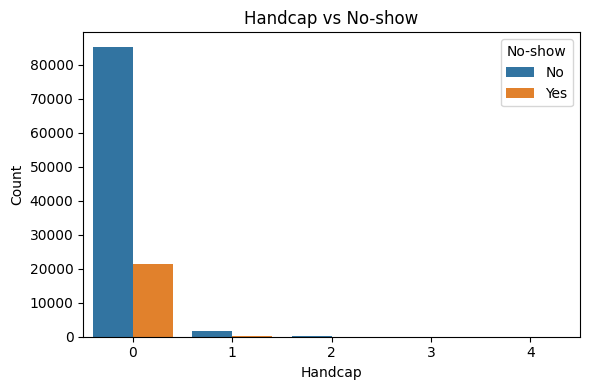

In [15]:
def analyze_medical_condition(data, condition):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=condition, hue='No-show', data=data)
    plt.title(f'{condition} vs No-show')
    plt.xlabel(condition)
    plt.ylabel('Count')
    
    # Set custom labels for x-axis
    if condition == 'Hipertension':  # Replace 'Hipertension' with your actual condition name
        plt.xticks(ticks=[0, 1], labels=['Have not condition', 'Have the condition'])
    elif condition == 'Diabetes':  # Replace 'Diabetes' with your actual condition name
        plt.xticks(ticks=[0, 1], labels=['Have not condition', 'Have the condition'])
    # Add more conditions as needed

    plt.tight_layout()
    plt.show()

# Preprocess the data
data = preprocess_data(data)

# List of medical conditions
conditions = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']

# Loop through medical conditions and analyze each
for condition in conditions:
    analyze_medical_condition(data, condition)

In [ ]:
#Analysing Gender Impact On Attendnce

Number of rows before processing: 108860


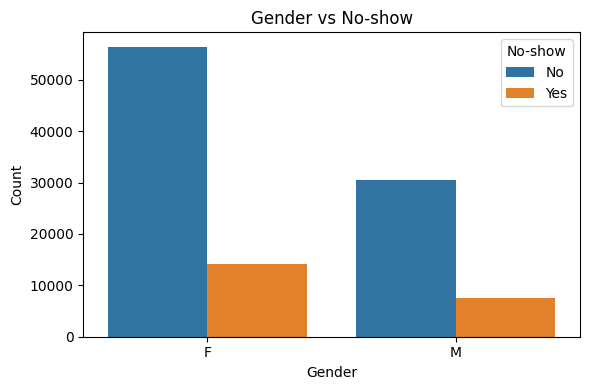

In [16]:
# Function to analyze factors' influence on attendance
def analyze_gender(data):

    plt.figure(figsize=(6, 4))
    sns.countplot(x='Gender', hue='No-show', data=data)
    plt.title('Gender vs No-show')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Preprocess the data
data = preprocess_data(data)

# Analyze Gender vs No-show
analyze_gender(data)

In [ ]:
#Analysing AppointmentDay On Attendance

Number of rows before processing: 108860


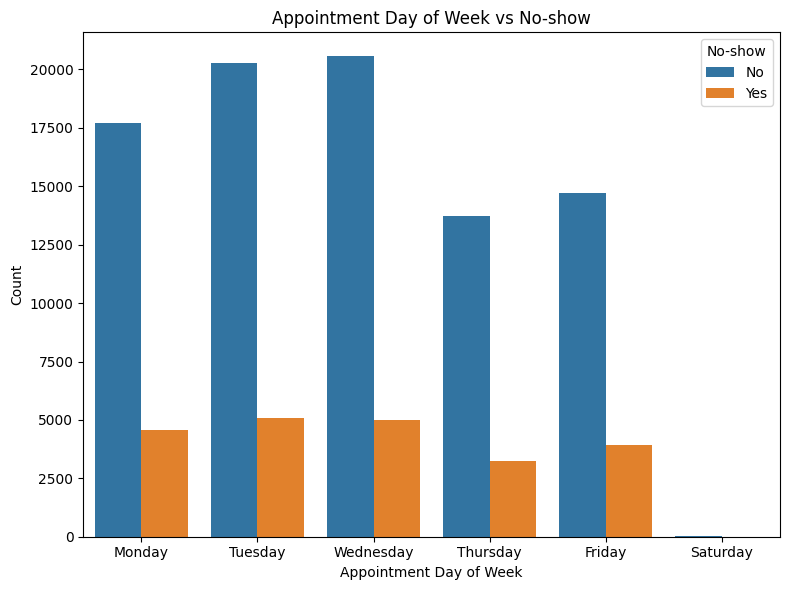

In [17]:
# Function to analyze factors' influence on attendance
def analyze_appointment_day(data):
    data['AppointmentDayOfWeek'] = data['AppointmentDay'].dt.day_name()
    plt.figure(figsize=(8, 6))
    sns.countplot(x='AppointmentDayOfWeek', hue='No-show', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
    plt.title('Appointment Day of Week vs No-show')
    plt.xlabel('Appointment Day of Week')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Preprocess the data
data = preprocess_data(data)

# Analyze Appointment Day of Week vs No-show
analyze_appointment_day(data)

In [ ]:
#Defining Feature

In [18]:
# Define features and target variable
features = ['Neighbourhood', 'Scholarship', 'SMS_received', 'Age', 'Gender', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
X = data[features]
y = data['No-show']

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Spliting Data into Train and Test

In [20]:
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Initializing and Training The Random Forest Classifier

In [22]:
# Initialize and train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Making Prediction on test set

In [23]:
# Predict on test set
y_pred = model.predict(X_test)

In [ ]:
#Evaluating the Model

In [25]:
# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.7598750688958295
Classification Report:
              precision    recall  f1-score   support

          No       0.81      0.91      0.86     17441
         Yes       0.30      0.15      0.20      4331

    accuracy                           0.76     21772
   macro avg       0.55      0.53      0.53     21772
weighted avg       0.71      0.76      0.73     21772

Confusion Matrix:
[[15898  1543]
 [ 3685   646]]


In [ ]:
#Prediction Result Evaluation

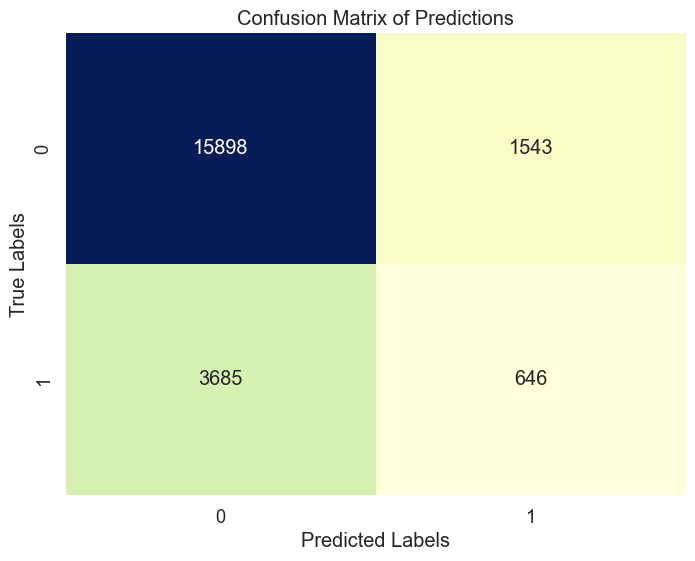

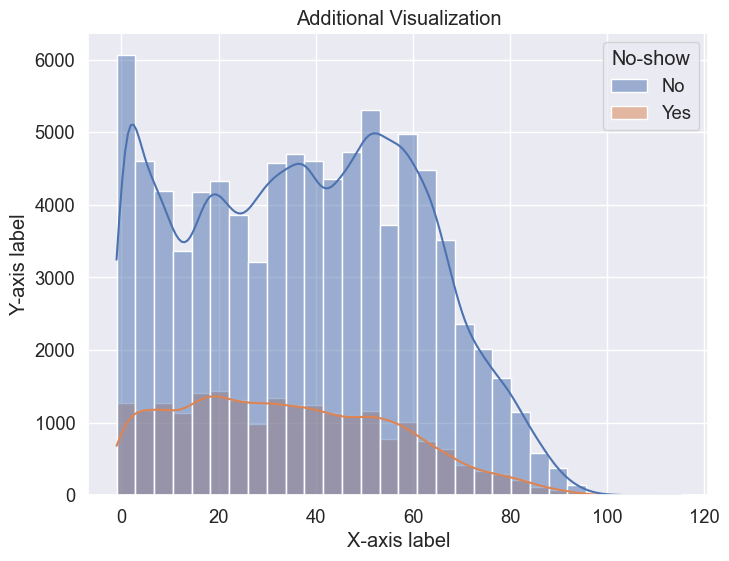

In [26]:
# Visualization of prediction results - Confusion Matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Predictions')
plt.show()

# Additional Visualization (Replace this with your specific visualization)
plt.figure(figsize=(8, 6))
# Add your visualization code here
# For example:
sns.histplot(data=data, x='Age', hue='No-show', bins=30, kde=True)
plt.title('Additional Visualization')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.show()

In [ ]:
#Other Visualization

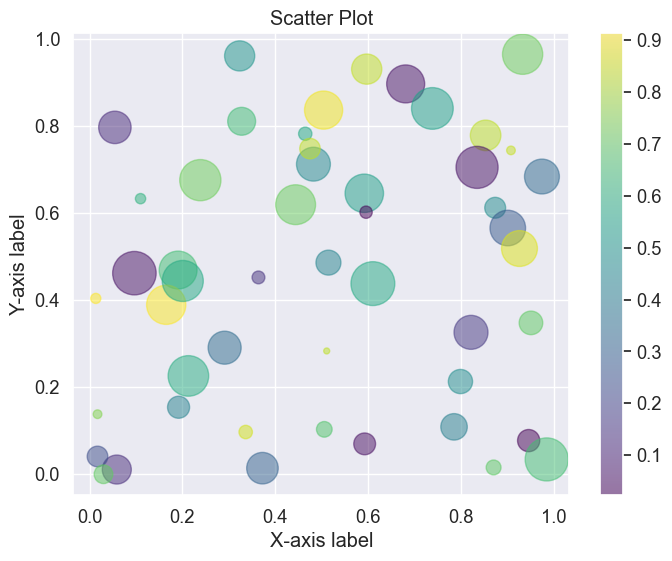

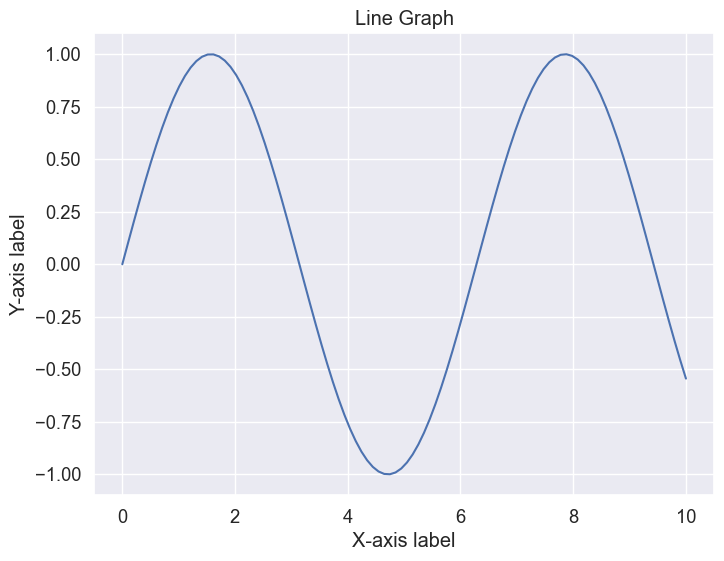

In [28]:
# Scatter plot with description
import numpy as np

plt.figure(figsize=(8, 6))

# Generate random data for demonstration
x = np.random.rand(50)
y = np.random.rand(50)
colors = np.random.rand(50)
sizes = 1000 * np.random.rand(50)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='viridis')
plt.colorbar()  # Add color bar legend
plt.title('Scatter Plot')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
#plt.text(0.5, -0.1, 'This scatter plot demonstrates the relationship\nbetween X and Y variables.', ha='center', transform=plt.gca().transAxes)
plt.show()

# Line graph with description
plt.figure(figsize=(8, 6))

# Generate random data for demonstration
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.title('Line Graph')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.grid(True)  # Add gridlines
#plt.text(0.5, -0.1, 'This line graph illustrates the sine function\nover the range of X values.', ha='center', transform=plt.gca().transAxes)
plt.show()

In [ ]:
#Conclusion
#Accuracy......76%